# Data Visualization with Seaborn

In this notebook, I am using various visualization tools in Seaborn package and use them for the HousePrice dataset.
This also requires polishing and transforming the features.

In [70]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

## Load the data

In [71]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

## Check for null / missing values

In [72]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)

# Check for Null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [73]:
# Informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Remove bad features

In [74]:
for k in train.keys():
    if train[k].isnull().sum() >10:
        train = train.drop(columns=[k])
# Check for Null values
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 65, dtype: int64

In [75]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [77]:
crr = train[list(train.keys())].corr()
crr_sort = crr['SalePrice'].sort_values(ascending=False)
key_list = list(crr_sort[0:15].keys())

key_list.append('Neighborhood')
print(key_list)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', 'Neighborhood']


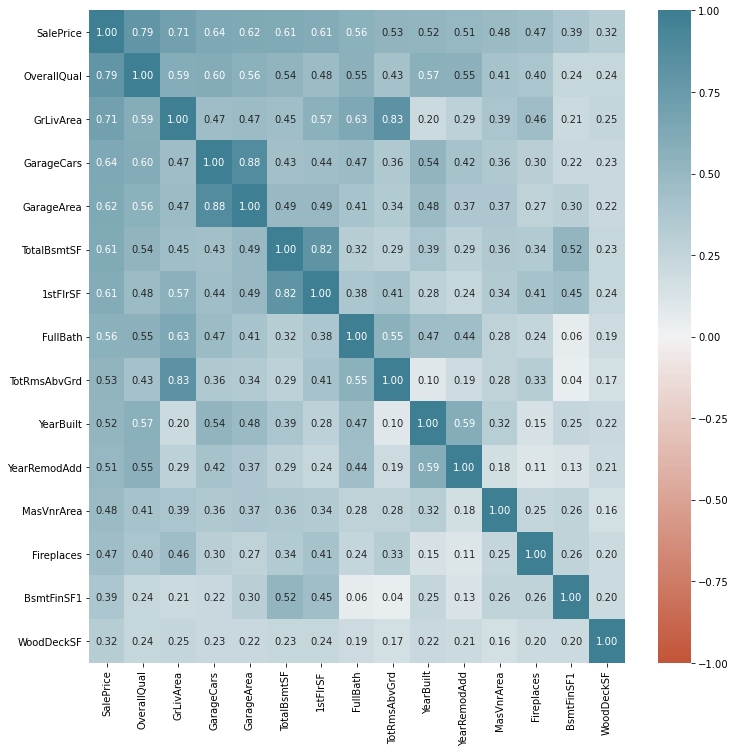

In [78]:
plt.subplots(figsize=(12,12))
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
crr=train[key_list].corr()

g = sns.heatmap(crr,
                vmin=-1, vmax=1, center=0,
                annot=True, fmt = ".2f",
                cmap = sns.diverging_palette(20, 220, n=200))


We can check in more details how 'OverallQual' is related to the 'SalePrice'.

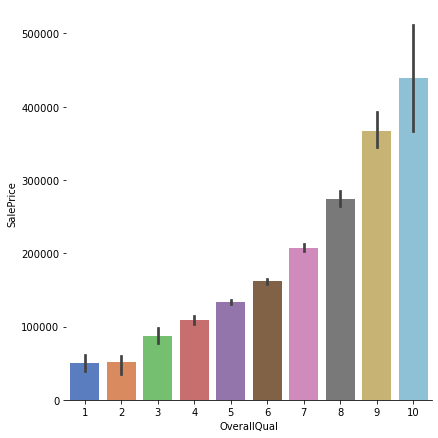

In [79]:
g = sns.catplot(x='OverallQual', y='SalePrice', data=train, kind="bar", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("SalePrice")

## Distribution of the price
So far we have understood how much Quality affects the house price. We can investigate how the house price is distributed when the quality is High, Medium, or Low 

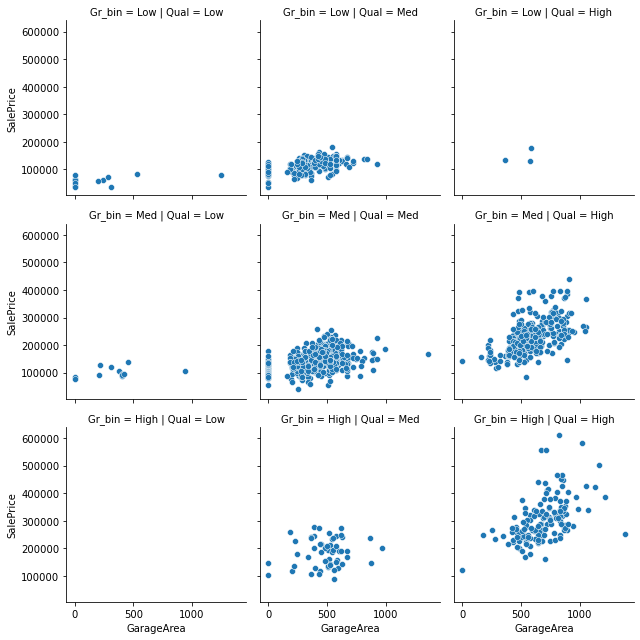

In [80]:
train['Qual'] = pd.cut(train['OverallQual'], bins=[0,3,6,10], labels=['Low','Med','High'])

train['Gr_bin'] = pd.cut(train['GrLivArea'], bins=[0,1000,2000,3000], labels=['Low','Med','High'])

g = sns.FacetGrid(train, col='Qual',  row='Gr_bin')

g = g.map(sns.scatterplot, 'GarageArea','SalePrice')

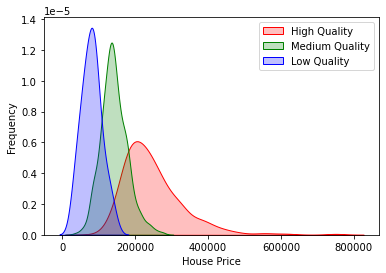

In [81]:
g = sns.kdeplot(train['SalePrice'][(train['Qual'] == 'High')], color="Red", shade = True)
g = sns.kdeplot(train['SalePrice'][(train['Qual'] == 'Med')], ax =g, color="Green", shade= True)
g = sns.kdeplot(train['SalePrice'][(train['Qual'] == 'Low')], ax =g, color="Blue", shade= True)
g.set_xlabel("House Price")
g.set_ylabel("Frequency")
g = g.legend(["High Quality","Medium Quality","Low Quality"])


## Box plots
We can check the range and density of the price values for different Ground Living Area levels via box plots.

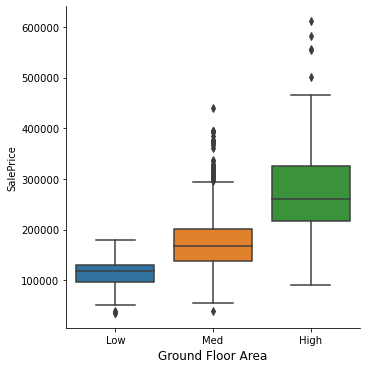

In [82]:
g = sns.catplot(y="SalePrice", x="Gr_bin", data=train, kind="box")
plt.xlabel("Ground Floor Area", size=12)

train = train.drop(columns=['Qual','Gr_bin'])

# Merge all data

In [83]:
x_train = train[key_list]
x_train = x_train.drop(columns=['SalePrice'])
x_test = test[x_train.keys()]

data = pd.concat([x_train,x_test], ignore_index= True)

## Handle NAN values

In [84]:
print(data.isnull().sum(),'\n ********')

for feature in data.keys():
    data[feature] = data[feature].fillna(data[feature].mode()[0])
    
print(data.isnull().sum())

OverallQual      0
GrLivArea        0
GarageCars       1
GarageArea       1
TotalBsmtSF      1
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      23
Fireplaces       0
BsmtFinSF1       1
WoodDeckSF       0
Neighborhood     0
dtype: int64 
 ********
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
Neighborhood    0
dtype: int64


## If a feature is highly skewed

It is possible that we can transform the values with logarithm to mitigate that.

[0.19721180528040133, 1.2700104075191514, -0.21870492080546935, 0.23937994894009415, 1.157489025821493, 1.4703601055379227, 0.16769191818882379, 0.7587568676624701, -0.6001139748696814, -0.45125229728739846, 2.6149360706240214, 0.733871770878103, 1.4259630549308222, 1.8433802126628294]
OverallQual
GrLivArea
GarageCars
GarageArea
TotalBsmtSF
1stFlrSF
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd
MasVnrArea
Fireplaces
BsmtFinSF1
WoodDeckSF
Neighborhood
[0.19721180528040133, 0.013194362973261287, -0.21870492080546935, 0.23937994894009415, -4.958842187588636, 0.06486101674723506, 0.16769191818882379, 0.7587568676624701, -0.6001139748696814, -0.45125229728739846, 0.5372943324957613, 0.733871770878103, -0.6169489530888203, 0.15811426310497517]
Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', 'Neighborhood'],
      dtype='object

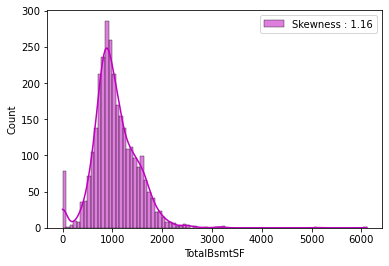

In [88]:
g = sns.histplot(data['TotalBsmtSF'], kde=True, color="m", label="Skewness : %.2f"%(data['TotalBsmtSF'].skew()))
g = g.legend(loc="best")

sk = []
for k in data.keys():
    if data[k].dtype!=object:
        sk.append(data[k].skew())
print(sk)

sk=[]
for k in data.keys():
    print(k)
    if data[k].dtype!=object:
        if abs(data[k].skew())>1:
           data[k] = data[k].map(lambda i: np.log1p(i)) 
        sk.append(data[k].skew())
print(sk)

print(data.keys())

## Add a new feature

In [89]:
data['total_sf'] =  data['TotalBsmtSF'] + data['1stFlrSF']

## What is a good neighberhood

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


C:\ProgramData\Anaconda3\envs\MLON\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


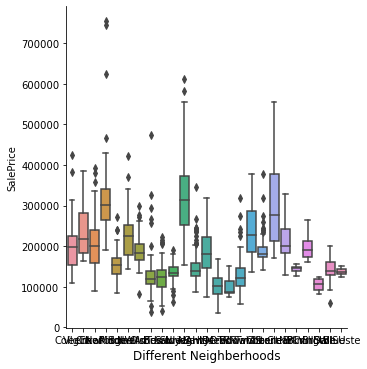

In [97]:
g = sns.catplot(y="SalePrice", x="Neighborhood", data=train, kind="box")
plt.xlabel("Different Neighberhoods", size=12)

neighbors = train['Neighborhood'].unique()
print(neighbors)

data['Neighborhood_Qual']=-1
for ne in neighbors:
    if train['SalePrice'].loc[train['Neighborhood'] == ne].mean()>180000:
        data['Neighborhood_Qual'].loc[data['Neighborhood'] == ne] = 1
    

In [98]:
data = data.drop(columns=['Neighborhood'])

## Change categories to numbers

In [99]:
for k in data.keys():
    if data[k].dtype == 'object':
        data[k] = pd.Categorical(data[k])
        data[k] = data[k].cat.codes
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,total_sf,Neighborhood_Qual
0,7,7.444833,2.0,548.0,6.753438,6.753438,2,8,2003,2003,5.283204,0,6.561031,0.000000,13.506876,1
1,6,7.141245,2.0,460.0,7.141245,7.141245,2,6,1976,1976,0.000000,1,6.886532,5.700444,14.282490,1
2,7,7.488294,2.0,608.0,6.825460,6.825460,2,6,2001,2002,5.093750,1,6.188264,0.000000,13.650920,1
3,7,7.448916,3.0,642.0,6.629363,6.869014,1,7,1915,1970,0.000000,1,5.379897,0.000000,13.498378,1
4,8,7.695758,3.0,836.0,7.044033,7.044033,2,9,2000,2000,5.860786,1,6.486161,5.262690,14.088066,1


In [100]:
data = pd.get_dummies(data)
data.head()


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,total_sf,Neighborhood_Qual
0,7,7.444833,2.0,548.0,6.753438,6.753438,2,8,2003,2003,5.283204,0,6.561031,0.000000,13.506876,1
1,6,7.141245,2.0,460.0,7.141245,7.141245,2,6,1976,1976,0.000000,1,6.886532,5.700444,14.282490,1
2,7,7.488294,2.0,608.0,6.825460,6.825460,2,6,2001,2002,5.093750,1,6.188264,0.000000,13.650920,1
3,7,7.448916,3.0,642.0,6.629363,6.869014,1,7,1915,1970,0.000000,1,5.379897,0.000000,13.498378,1
4,8,7.695758,3.0,836.0,7.044033,7.044033,2,9,2000,2000,5.860786,1,6.486161,5.262690,14.088066,1
